## Dependencies

In [1]:
%load_ext autoreload
%autoreload 2

# for exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# needed to split the data
from sklearn.model_selection import train_test_split

from custom_code.eda import plot_default_rate

## Constants

In [2]:
data_path = "./data/good-bad-customers-data.csv"
layout_path = "./data/good-bad-customers-layout.csv"
seed = 42

target_column = "f_3pva18m"
id_column = "N_SOLICITUD"
record_date_column = "mes_solicitud"

## Reading the data

In [16]:
df = pd.read_csv(data_path)
df_layout = pd.read_csv(layout_path)

In [17]:
# reformating
df.drop(id_column, axis=1 ,inplace=True)
# we are only interested in the respective month
df[record_date_column] = df[record_date_column].astype(str).str.replace("-", "").str[:-2]

### Exploratory Data Analysis

In [18]:
df.isna().mean().sort_values(ascending=False)

razon_monto_apagar_saldo_vencido_ban_all                         0.940856
razon_monto_apagar_saldo_vencido_open                            0.875093
razon_maximo_saldo_maxima_mora_maximo_credito_masalto_ban_all    0.414113
r_sumhhda_sumhc_ban_all                                          0.414113
r_sumhhda_sumhc_open                                             0.227821
razon_maximo_saldo_maxima_mora_maximo_credito_masalto_open       0.227821
razon_saldo_vencido_saldo_actual_ban_all                         0.191203
razon_monto_apagar_saldo_actual_ban_all                          0.188961
utilizacion_maximo_limite_ban_all                                0.072809
razon_monto_apagar_saldo_actual_open                             0.056582
razon_saldo_vencido_saldo_actual_open                            0.056261
razon_monto_apagar_limite_credito_ban_all                        0.029145
r_sumapd_sumcl_ban_all                                           0.028291
suma_saldo_vencido_ban_all            

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
f_3pva18m,9367.0,0.234654,0.423805,0.000000,0.000000,0.000000,0.000000,1.000000e+00
edad,9314.0,41.176294,11.613226,18.000000,31.000000,40.000000,50.000000,8.100000e+01
suma_saldo_vencido_open,9300.0,108.110931,1229.293178,0.000000,0.000000,0.000000,0.000000,6.870167e+04
suma_saldo_actual_open,9314.0,43987.257224,96497.244713,0.000000,2733.830856,13725.629135,48723.070930,2.651940e+06
razon_monto_apagar_saldo_actual_open,8837.0,0.175916,5.964184,0.000000,0.017373,0.037038,0.072807,5.510000e+02
razon_monto_apagar_limite_credito_open,9274.0,2.135589,163.078788,0.000000,0.009067,0.018973,0.041546,1.548400e+04
razon_monto_apagar_saldo_vencido_open,1170.0,81.577101,757.073048,0.000000,1.724164,4.134475,11.508662,1.997900e+04
razon_maximo_saldo_maxima_mora_maximo_credito_masalto_open,7233.0,0.039617,0.142902,0.000000,0.000000,0.004347,0.023909,4.046724e+00
razon_saldo_vencido_saldo_actual_open,8840.0,0.011586,0.081104,0.000000,0.000000,0.000000,0.000000,1.000000e+00
suma_ponderada_pagos_12m_open,9314.0,0.567858,0.227517,0.000000,0.510075,0.531732,0.571465,1.095445e+01


In [20]:
df.dtypes

f_3pva18m                                                          int64
mes_solicitud                                                     object
edad                                                             float64
suma_saldo_vencido_open                                          float64
suma_saldo_actual_open                                           float64
razon_monto_apagar_saldo_actual_open                             float64
razon_monto_apagar_limite_credito_open                           float64
razon_monto_apagar_saldo_vencido_open                            float64
razon_maximo_saldo_maxima_mora_maximo_credito_masalto_open       float64
razon_saldo_vencido_saldo_actual_open                            float64
suma_ponderada_pagos_12m_open                                    float64
suma_ponderada_pagos_18m_open                                    float64
suma_ponderada_pagos_24m_open                                    float64
r_sumapd_sumcl_open                                

------------------------------------------------------------------------------------------------------------------------


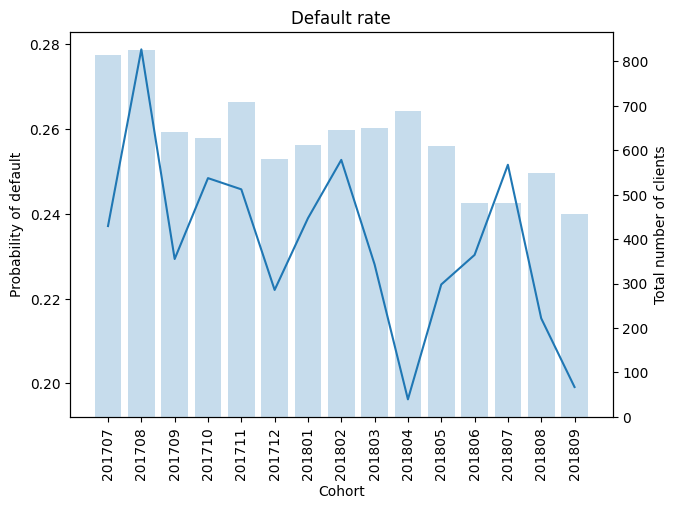

------------------------------------------------------------------------------------------------------------------------


,mes_solicitud,default_rate,counting,reversed_cumulated_counting
0,201707,0.237101,814,1.000000
1,201708,0.278788,825,0.913099
2,201709,0.229329,641,0.825024
3,201710,0.248408,628,0.756592
4,201711,0.245763,708,0.689548
5,201712,0.222031,581,0.613964
6,201801,0.238953,611,0.551938
7,201802,0.252713,645,0.486709
8,201803,0.228043,649,0.417850
9,201804,0.196221,688,0.348564


------------------------------------------------------------------------------------------------------------------------
The percentage of bad clients is  23.47%.
------------------------------------------------------------------------------------------------------------------------


In [58]:
print("-"*120)
default_rate_summary = plot_default_rate(df, target_column, record_date_column, (7, 5))
print("-"*120)
display(default_rate_summary)
print("-"*120)
print(f"The percentage of bad clients is {100 * df[target_column].mean() : .2f}%.")
print("-"*120)

### Train, test and OOT

Before moving forward, we split the data into three datasets:

    1. OOT: Used to simulate performance in a production evironment. It can help us to capture whether our model worsens its predictions over time.
    2. Train: Used to train the model.
    3. Test: Used to estimate the model performance over a dataset independent to the train one.

For this task, we will be using the set of datapoints corresponding to 201808 and 201809 as OOT. From the complement of it we will be taking the train and test data, using stratified sampling.